In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  
import calendar
import argparse
import glob
import geopandas
from geodatasets import get_path

In [2]:
all_npp = pd.read_csv('all_npp.csv')


In [5]:
all_npp.loc[
(all_npp['lon']==71.5) & (all_npp['lat']==24.0) & (all_npp['year'] >= 2021)
]


,index,lon,lat,year,ipft,cohort_area,potential_veg,current_veg,annual_sum,monthly_maximum,monthly_mean,monthly_minimum,pft,forest_type
6892834,52842,71.5,24.0,2021,18,224,19,19,0.3,0.1,0.02,-0.0,forest,Xeromorphic Forests and Woodlands
6892835,52843,71.5,24.0,2021,49,8,19,19,92714.8,20019.8,7726.23,756.5,forest,Xeromorphic Forests and Woodlands
6892836,52844,71.5,24.0,2021,50,3,19,19,0.0,0.0,0.00,0.0,forest,Xeromorphic Forests and Woodlands
6892837,52845,71.5,24.0,2022,18,224,19,19,-0.0,-0.0,-0.00,-0.0,forest,Xeromorphic Forests and Woodlands
6892838,52846,71.5,24.0,2022,49,8,19,19,102347.7,15964.9,8528.98,720.9,forest,Xeromorphic Forests and Woodlands
6892839,52847,71.5,24.0,2022,50,3,19,19,0.0,0.0,0.00,0.0,forest,Xeromorphic Forests and Woodlands


In [34]:
output_col_names = ['lon'
,'lat'
,'variable'
,'ipft'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

input_col_names = ["lon", 'lat','var' ,'Area', 'year', 'sum', 'max', 'average'
         , 'min', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
         , 'Nov', 'Dec', 'Area_Name']

In [2]:
npp_sum = pd.read_csv('condensed_variables_NPP.csv')

In [35]:
test = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/agg_tem_test/var_out/VEGC.csv61397',names = 
                  output_col_names1)

In [49]:
colnames_max = ['lon', 'lat', 'variable', 'total land area', 'year', 'total number of cohorts',
                'number of natural cohorts', 'region']

In [50]:
maxcohorts = pd.read_csv('~/land_data_processing/cpp_runs/get_years/historical_max_cohorts.txt', names = colnames_max)


In [51]:
maxcohorts.loc[(maxcohorts['lon']==157)
           &(maxcohorts['lat']==68.5)
           &(maxcohorts['year']==1502)
           ]

,lon,lat,variable,total land area,year,total number of cohorts,number of natural cohorts,region
31622547,157.0,68.5,MXCOHRTS,1120,1502,2,2,Asia


In [38]:
test2 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/historical_run/var_out/VEGC.csv61397',names = 
                  output_col_names)

In [43]:
test.loc[(test['lon']==157)
           &(test['lat']==68.5)
           &(test['year']==1502)
           ]

,lon,lat,variable,ipft,potential_veg,current_veg,subtype,community_type,silt_clay,lc_state,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
3084,157.0,68.5,VEGC,2,6,6,3,3,60.56,1,...,590.89,579.61,598.48,646.14,661.63,617.60,606.49,598.84,591.60,Russia
3085,157.0,68.5,VEGC,3,6,6,3,3,60.56,1,...,3688.89,3696.54,3732.89,3762.93,3780.30,3776.26,3762.67,3750.11,3737.64,Russia


In [46]:
test.loc[3085]

lon                  157.0
lat                   68.5
variable             VEGC 
ipft                     3
potential_veg            6
current_veg              6
subtype                  3
community_type           3
silt_clay            60.56
lc_state                 1
land_area             1120
cohort_area            559
year                  1502
annual_sum         44820.5
monthly_maximum     3780.3
monthly_mean       3735.04
monthly_minimum     3688.9
Jan                3721.66
Feb                3711.02
Mar                 3699.6
Apr                3688.89
May                3696.54
Jun                3732.89
Jul                3762.93
Aug                 3780.3
Sep                3776.26
Oct                3762.67
Nov                3750.11
Dec                3737.64
region              Russia
Name: 3085, dtype: object

In [36]:
tt = test.groupby(['lon','lat','year','current_veg'])['potential_veg'].count().reset_index()
tt.loc[tt['potential_veg']>1,]


,lon,lat,year,current_veg,potential_veg
3084,157.0,68.5,1502,6,2
3085,157.0,68.5,1503,6,2
3086,157.0,68.5,1504,6,2
3087,157.0,68.5,1505,6,2
3088,157.0,68.5,1506,6,2
...,...,...,...,...,...
616281,179.5,-16.5,2011,51,4
616282,179.5,-16.5,2012,51,4
616283,179.5,-16.5,2013,16,4
616284,179.5,-16.5,2014,51,4


In [ ]:
test2

In [26]:
tt = all_npp.groupby(['lon','lat','year','current_veg'])['potential_veg'].count().reset_index()
tt.loc[tt['potential_veg']>1,]


,lon,lat,year,current_veg,potential_veg
139,-177.0,-44.0,1965,33,3
140,-177.0,-44.0,1966,33,3
141,-177.0,-44.0,1969,33,3
142,-177.0,-44.0,1970,33,3
143,-177.0,-44.0,1971,33,3
...,...,...,...,...,...
5852803,179.5,-16.5,1962,16,3
5852804,179.5,-16.5,1965,16,3
5852805,179.5,-16.5,1966,16,3
5852806,179.5,-16.5,1967,16,3


In [30]:
tt.loc[(tt['lon']==-149.5)
      &(tt['potential_veg']>1)]

,lon,lat,year,current_veg,potential_veg
89514,-149.5,60.0,1939,9,2
89515,-149.5,60.0,1940,9,2
89516,-149.5,60.0,1941,9,2
89517,-149.5,60.0,1942,9,2
89518,-149.5,60.0,1943,9,2
...,...,...,...,...,...
89574,-149.5,60.0,2005,9,3
89575,-149.5,60.0,2006,9,3
89576,-149.5,60.0,2007,9,3
89577,-149.5,60.0,2008,9,3


In [31]:
all_npp.loc[(all_npp['lon']==-149.5)
           &(all_npp['lat']==60)
           &(all_npp['year']==1939)
           ]

,index,lon,lat,year,ipft,cohort_area,potential_veg,current_veg,annual_sum,monthly_maximum,monthly_mean,monthly_minimum,pft,forest_type
13001988,37974,-149.5,60.0,1939,8,1531,9,9,258.9,64.7,21.57,-7.9,forest,Temperate Coniferous Forests
13001989,37975,-149.5,60.0,1939,49,1,9,9,37.6,26.6,3.13,-2.3,forest,Temperate Coniferous Forests


In [3]:
npp_sum = pd.read_csv('condensed_variables_NPP.csv')
vegc_sum = pd.read_csv('condensed_variables_VEGC.csv')
soilorgc_sum = pd.read_csv('condensed_variables_SOILORGC.csv')

In [8]:
climate_vars = pd.read_csv('all_climate_vars.csv')

In [11]:
climate_vars.columns

Index(['lon', 'lat', 'Area', 'year', 'prec_average', 'prec_max', 'prec_min',
       'par_average', 'par_max', 'par_min', 'tair_average', 'tair_max',
       'tair_min', 'nirr_average', 'nirr_max', 'nirr_min', 'vpr_average',
       'vpr_max', 'vpr_min', 'ws10_average', 'ws10_max', 'ws10_min'],
      dtype='object')

In [12]:
analysis = npp_sum.merge(climate_vars[['lon', 'lat', 'year', 'prec_average'
                                      ,'par_average','tair_average','nirr_average','vpr_average']], on = ['lon', 'lat', 'year'])



In [26]:
analysis.groupby(['prec_average','tair_average'])['temp_weight'].mean().reset_index()

,prec_average,tair_average,temp_weight
0,1.25,12.48,5424.0
1,1.32,12.19,2337.6
2,1.39,14.38,0.2
3,1.50,15.05,198237.4
4,1.65,12.51,2881.7
...,...,...,...
285456,849.00,25.75,2700571.8
285457,855.32,26.18,2292909.3
285458,888.91,25.50,1983105.8
285459,890.73,25.93,2988574.8


In [40]:
# tair_prec = analysis.groupby(['prec_average','tair_average'])['temp_weight'].mean().reset_index()
# tair_prec = tair_prec.pivot(index='prec_average', columns = 'tair_average', values = 'temp_weight').reset_index()
tair_prec = pd.pivot_table(analysis.loc[analysis['temp_weight'].between(-100, 2000)], values = 'temp_weight'
               ,index = ['prec_average'],columns = ['tair_average'],
               aggfunc='mean')

In [30]:
tair_prec.loc[1.25, 12.48]

5424.0

In [36]:
tair_prec.reset_index()

tair_average,prec_average,-14.92,-14.77,-14.73,-14.66,-14.54,-14.42,-14.38,-14.36,-14.33,...,29.58,29.6,29.63,29.64,29.71,29.72,29.73,29.82,29.88,29.93
0,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33704,849.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33705,855.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33706,888.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33707,890.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


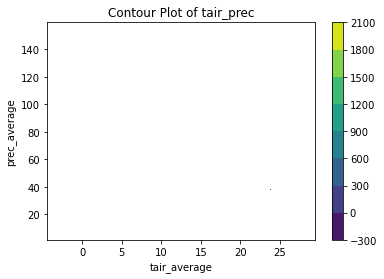

In [41]:
# Create the contour plot
X = tair_prec.columns.values
Y = tair_prec.index.values
Z = tair_prec.values

plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('tair_average')
plt.ylabel('prec_average')
plt.title('Contour Plot of tair_prec')

plt.show()


In [19]:
all_npp.loc[all_npp['annual_sum'] > 4000].groupby('forest_type')['annual_sum'].count()

forest_type
Boreal Woodlands                             59
Mixed Temperate Forests                     444
Temperate Broadleaved Evergreen Forests     198
Temperate Coniferous Forests                381
Temperate Deciduous Forests                  19
Temperate Forested Floodplains              207
Tropical Deciduous Forests                 4873
Tropical Evergreen Forests                  453
Xeromorphic Forests and Woodlands          3362
Name: annual_sum, dtype: int64

In [78]:
all_npp.loc[
(all_npp['lon']==-177.0)
    &(all_npp['lat']==-44)
    &(all_npp['year']==1965)
]

,index,lon,lat,year,ipft,cohort_area,potential_veg,current_veg,annual_sum,monthly_maximum,monthly_mean,monthly_minimum,pft,forest_type
17178,17178,-177.0,-44.0,1965,32,20,33,33,682.5,126.4,56.88,1.3,forest,Temperate Broadleaved Evergreen Forests
17179,17179,-177.0,-44.0,1965,49,82,33,33,38.1,23.8,3.17,-3.1,forest,Temperate Broadleaved Evergreen Forests
17180,17180,-177.0,-44.0,1965,50,888,33,33,53.5,12.9,4.46,-0.2,forest,Temperate Broadleaved Evergreen Forests


In [ ]:
land_cover

land_cover = geopandas.GeoDataFrame(
    land_cover, geometry=geopandas.points_from_xy(land_cover.lon, land_cover.lat)
    , crs="EPSG:4326"
)
land_cover



,lon,lat,pft,forest_type,value_weight
0,-177.0,-44.0,forest,Temperate Broadleaved Evergreen Forests,297.966316
1,-176.5,-44.0,forest,Temperate Broadleaved Evergreen Forests,242.006804
2,-175.5,-21.5,forest,Tropical Evergreen Forests,208.196563
3,-166.5,64.5,forest,Boreal Forest,104.609697
4,-166.0,64.5,forest,Boreal Forest,91.337576
...,...,...,...,...,...
29362,179.0,-18.5,forest,Tropical Evergreen Forests,1040.380000
29363,179.0,-17.0,forest,Tropical Evergreen Forests,1167.320420
29364,179.0,-16.5,forest,Tropical Evergreen Forests,896.577876
29365,179.5,-17.0,forest,Tropical Evergreen Forests,1217.201577


In [14]:
plot_npp_sum = npp_sum.loc[npp_sum['year'].between(1850, 2014)].groupby(['lon', 'lat', 'pft', 'forest_type'])['value_weight'].mean()

plot_npp_sum = plot_npp_sum.reset_index()
# plot_npp_sum
plot_npp_sum = geopandas.GeoDataFrame(
    plot_npp_sum, geometry=geopandas.points_from_xy(plot_npp_sum.lon, plot_npp_sum.lat)
    , crs="EPSG:4326"
)
plot_npp_sum=plot_npp_sum.loc[~plot_npp_sum['forest_type'].str.contains(r'Wetland|Woodlands|Floodplain')]

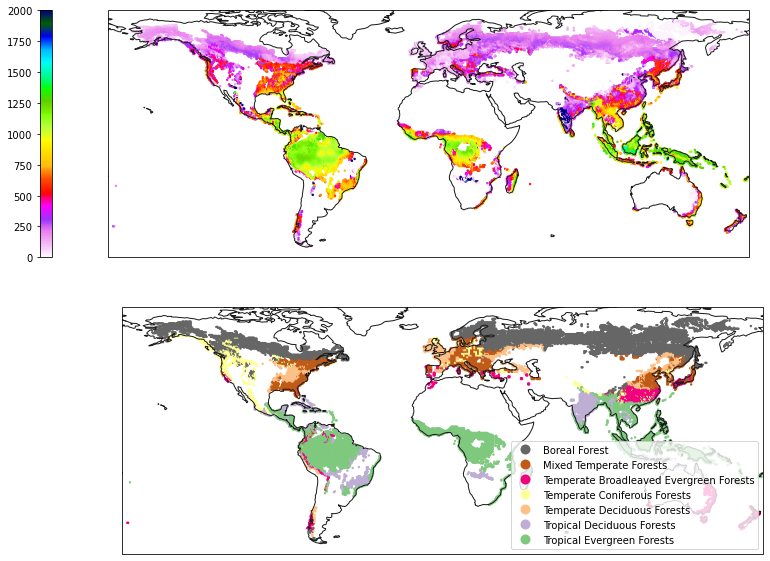

In [62]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=2, ncols=1,figsize = (20, 10)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs[0].coastlines(color="0.1")
axs[1].coastlines(color="0.1")


plot0 = plot_npp_sum.plot(ax = axs[0] 
                                         ,cmap = 'gist_ncar_r', markersize = 2
                                         , column = 'value_weight', legend = True, 
                                         vmin = 0, vmax = 2000,
                                        legend_kwds={ "location":"left" , "pad":0.05}
                                        )



plot1 = plot_npp_sum.plot(ax = axs[1] 
                                         ,cmap='Accent_r', markersize = 2
                                         , column = 'forest_type' , legend = True,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"center right" }
                                        )

# axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')


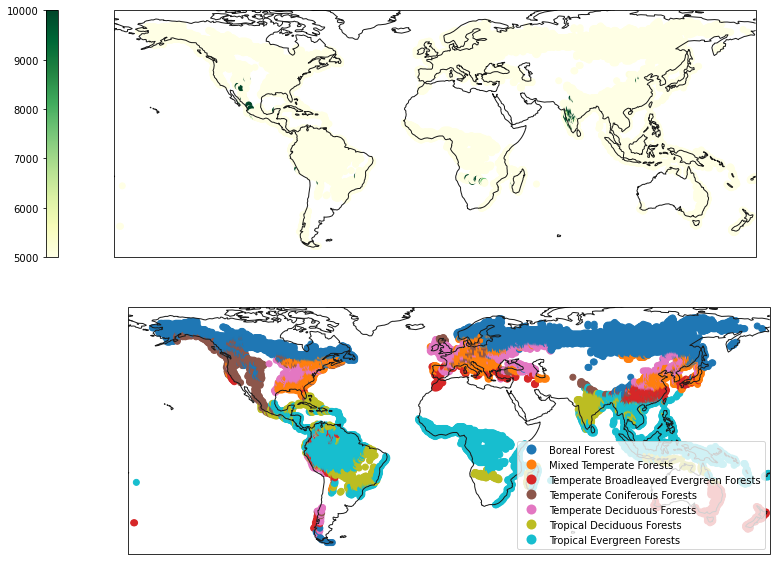

In [29]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=2, ncols=1,figsize = (20, 10)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs[0].coastlines(color="0.1")
axs[1].coastlines(color="0.1")


plot0 = plot_npp_sum.plot(ax = axs[0] 
                                         ,cmap = 'YlGn'
                                         , column = 'value_weight', legend = True, 
                                         vmin = 5000, vmax = 10000,
                                        legend_kwds={ "location":"left" , "pad":0.05}
                                        )



plot1 = plot_npp_sum.plot(ax = axs[1] 
                                         ,cmap='tab10'
                                         , column = 'forest_type' , legend = True,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"center right" }
                                        )

# axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')


In [31]:
all_vegc = pd.read_csv('all_vegc.csv')
all_vegc.describe()

,index,lon,lat,year,ipft,cohort_area,potential_veg,current_veg,annual_sum,monthly_maximum,monthly_mean,monthly_minimum
count,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07,1.338653e+07
mean,4.464410e+04,2.890256e+01,3.737509e+01,1.873727e+03,2.455502e+01,8.446735e+02,1.032191e+01,1.031601e+01,6.906375e+04,5.847170e+03,5.755313e+03,5.052350e+03
std,2.672721e+04,8.839315e+01,2.776337e+01,9.498191e+01,2.135833e+01,8.760676e+02,7.008328e+00,6.988945e+00,3.791355e+06,3.162392e+05,3.159462e+05,1.101817e+04
min,0.000000e+00,-1.770000e+02,-5.600000e+01,1.702000e+03,2.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.270500e+04,-6.350000e+01,1.650000e+01,1.790000e+03,3.000000e+00,8.000000e+01,6.000000e+00,6.000000e+00,6.854000e+02,1.124000e+02,5.711000e+01,2.500000e+01
50%,4.345900e+04,3.050000e+01,4.800000e+01,1.882000e+03,1.500000e+01,6.100000e+02,8.000000e+00,8.000000e+00,8.508400e+03,8.406000e+02,7.090300e+02,5.962000e+02
75%,6.400500e+04,1.095000e+02,6.000000e+01,1.958000e+03,4.900000e+01,1.385000e+03,1.600000e+01,1.600000e+01,8.504115e+04,7.181500e+03,7.086765e+03,6.996300e+03
max,1.345160e+05,1.795000e+02,7.200000e+01,2.022000e+03,5.000000e+01,3.091000e+03,5.100000e+01,3.300000e+01,6.041567e+09,5.034639e+08,5.034639e+08,9.000000e+05


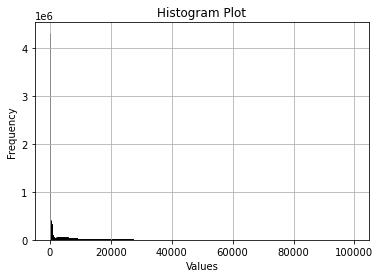

In [43]:


ax = all_vegc.loc[all_vegc['monthly_mean'] < 100000, 'monthly_mean'].hist(bins = 1000, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
plt.show()
ax.set_ylim(0, 1e6)
plt.show()

In [33]:
all_vegc['temp_weight'] = all_vegc['monthly_mean'] * all_vegc['cohort_area'] 


vegc_sum = all_vegc.groupby(
    ['lon','lat','year','pft','current_veg', 'forest_type']
)[['temp_weight', 'cohort_area']].sum()

# all_grids =  all_grids.reset_index()

vegc_sum['value_weight'] = vegc_sum['temp_weight']/vegc_sum['cohort_area']
vegc_sum = vegc_sum.reset_index()
# print('cohort rows post cohort collapse : '+ str(len(annual_cohort_output)))
vegc_sum

,lon,lat,year,pft,current_veg,forest_type,temp_weight,cohort_area,value_weight
0,-177.0,-44.0,1702,forest,33,Temperate Broadleaved Evergreen Forests,15255454.50,990,15409.550000
1,-177.0,-44.0,1703,forest,33,Temperate Broadleaved Evergreen Forests,15182392.50,990,15335.750000
2,-177.0,-44.0,1704,forest,33,Temperate Broadleaved Evergreen Forests,15079353.30,990,15231.670000
3,-177.0,-44.0,1705,forest,33,Temperate Broadleaved Evergreen Forests,15026031.90,990,15177.810000
4,-177.0,-44.0,1706,forest,33,Temperate Broadleaved Evergreen Forests,14992837.20,990,15144.280000
...,...,...,...,...,...,...,...,...,...
5852874,179.5,-16.5,1962,forest,16,Tropical Evergreen Forests,32831838.70,1250,26265.470960
5852875,179.5,-16.5,1965,forest,16,Tropical Evergreen Forests,32764940.40,1250,26211.952320
5852876,179.5,-16.5,1966,forest,16,Tropical Evergreen Forests,32836562.90,1250,26269.250320
5852877,179.5,-16.5,1967,forest,16,Tropical Evergreen Forests,32788708.36,1250,26230.966688


In [7]:
plot_vegc_sum = vegc_sum.loc[vegc_sum['year'].between(1850, 2014)].groupby(['lon', 'lat', 'pft', 'forest_type'])['value_weight'].mean()

plot_vegc_sum = plot_vegc_sum.reset_index()
# plot_vegc_sum
plot_vegc_sum = geopandas.GeoDataFrame(
    plot_vegc_sum, geometry=geopandas.points_from_xy(plot_vegc_sum.lon, plot_vegc_sum.lat)
    , crs="EPSG:4326"
)
plot_vegc_sum=plot_vegc_sum.loc[~plot_vegc_sum['forest_type'].str.contains(r'Wetland|Woodlands|Floodplain')]
plot_vegc_sum['value_weight'] = plot_vegc_sum['value_weight']/12

In [17]:
plot_soilorgc_sum = soilorgc_sum.loc[soilorgc_sum['year'].between(1850, 2014)].groupby(['lon', 'lat', 'pft', 'forest_type'])['value_weight'].mean()

plot_soilorgc_sum = plot_soilorgc_sum.reset_index()
# plot_soilorgc_sum
plot_soilorgc_sum = geopandas.GeoDataFrame(
    plot_soilorgc_sum, geometry=geopandas.points_from_xy(plot_soilorgc_sum.lon, plot_soilorgc_sum.lat)
    , crs="EPSG:4326"
)
plot_soilorgc_sum=plot_soilorgc_sum.loc[~plot_soilorgc_sum['forest_type'].str.contains(r'Wetland|Woodlands|Floodplain')]
plot_soilorgc_sum['value_weight'] = plot_soilorgc_sum['value_weight']/12

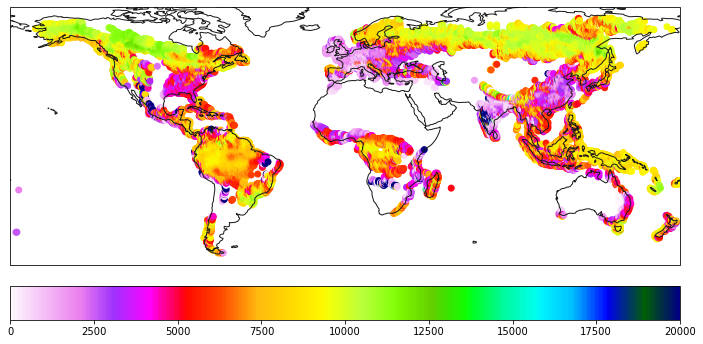

In [21]:
# sns.scatterplot(x='lon', y='lat',hue = 'value_weight', data = gpp)


ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (12, 8)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")


plot0 = plot_soilorgc_sum.plot(ax = axs 
                                         ,cmap = 'gist_ncar_r'
                                         , column = 'value_weight', legend = True, 
                                         vmin = 0, vmax = 20000,
                                        legend_kwds={ "location":"bottom" , "pad":0.05}
                                        )



# plot1 = plot_vegc_sum.plot(ax = axs[1] 
#                                          ,cmap='tab10'
#                                          , column = 'forest_type' , legend = True,
#                                          # ,vmin = 0, vmax = 1,
#                                         # legend_kwds={ "loc":"center right" }
#                                         )

# axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')


In [7]:
del prec, par, tair, nirr, vpr, ws10
##subset to forest veg types 
# cohort_output = cohort_output.loc[cohort_output['current_veg'].isin(forest_vegs)] 
print('clim processed')


clim processed


In [8]:
climate_vars
print('climate rows : '+ str(len(climate_vars)))

climate rows : 486864


In [37]:
###read in cohort output
cohort_output = pd.read_csv(read_in_data.loc[i, 'output_paths']
            , names = output_col_names)

print('cohort rows read in : '+ str(len(cohort_output)))

cohort rows read in : 41734


In [38]:
cohort_output.loc[1]

lon                 -180.0
lat                   65.0
variable             FRDL 
tt                       2
potential_veg            3
current_veg              3
subtype                  3
community_type           3
silt_clay            69.83
lc_state                 0
land_area             1040
cohort_area           1039
year                  1703
annual_sum            82.7
monthly_maximum       29.0
monthly_mean          6.89
monthly_minimum        0.1
Jan                   0.17
Feb                   0.38
Mar                   0.57
Apr                   0.66
May                   0.69
Jun                   0.67
Jul                  15.29
Aug                   29.0
Sep                  28.59
Oct                   6.38
Nov                   0.26
Dec                   0.07
region              Russia
Name: 1, dtype: object

In [10]:
###summary table of lat, lon, num years, num cohorts, 
summary_lon_lat = cohort_output.groupby(['lon', 'lat'])[['year']].nunique()
summary_lon_lat.to_csv('/home/smmrrr/TEM_output_processed/Aggregate_TEM/lon_lat_counts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)

In [20]:
##melt cohort output
cohort_output = pd.melt(cohort_output, id_vars = ['lon','lat', 'cohort_area', 'land_area', 'year','variable', 'current_veg', 'stand_age'], value_vars = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec'], 
         var_name='month', value_name='value'
        ,col_level=0)

print('cohort rows wide to long : '+ str(len(cohort_output)))

cohort rows wide to long : 500808


In [21]:
cohort_output

,lon,lat,cohort_area,land_area,year,variable,current_veg,stand_age,month,value
0,-180.0,65.0,1702,1039,84.9,FRDL,3,3,Jan,0.38
1,-180.0,65.0,1703,1039,82.7,FRDL,3,3,Jan,0.38
2,-180.0,65.0,1704,1039,44.5,FRDL,3,3,Jan,0.37
3,-180.0,65.0,1705,1039,77.9,FRDL,3,3,Jan,0.38
4,-180.0,65.0,1706,1039,90.0,FRDL,3,3,Jan,0.39
...,...,...,...,...,...,...,...,...,...,...
500803,-171.5,66.0,2018,1245,22.9,FRDL,2,2,Dec,Russia
500804,-171.5,66.0,2019,1245,24.3,FRDL,2,2,Dec,Russia
500805,-171.5,66.0,2020,1245,26.8,FRDL,2,2,Dec,Russia
500806,-171.5,66.0,2021,1245,19.4,FRDL,2,2,Dec,Russia


In [22]:
#### match pfts to the current veg, bin by standage for forests
conditions = [
 cohort_output['current_veg'].isin([50, 49, 52, 53, 54, 55, 56]) 
    ,cohort_output['current_veg'].isin([51, 47])
, cohort_output['current_veg'].isin([48, 46]) 
    ,cohort_output['current_veg'].isin([4, 5, 6, 8, 9, 
                                        10, 11, 16, 17, 18, 19, 20, 25, 33])
    ,cohort_output['current_veg'].isin([7, 12, 13, 14, 22, 23, 24, 25, 26, 27, 28, 30, 31])
    ,cohort_output['current_veg'].isin([15, 35, 29])
    ,cohort_output['current_veg'].isin([2, 3])
    ,cohort_output['current_veg'].isin([21])
]

values = [
          'crop', 
          'pasture', 
          'urban or suburban', 
          'forest', 
          'grass', 
          'shrub', 
          'tundra',
            'desert']
cohort_output['pft'] = np.select(conditions, values, default = 'other')

# intervals_standage = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 3000]
# cohort_output['stand_age_bin'] = pd.cut(
#     cohort_output['stand_age'], bins=intervals_standage)
# # print(annual_current_veg[['pft', 'stand_age_bin']].value_counts())
# cohort_output.loc[cohort_output['pft']!='forest', ['stand_age_bin']] =  cohort_output['stand_age_bin'].min()
# cohort_output['stand_age_interval_min'] = cohort_output['stand_age_bin'].apply(lambda x: x.right).astype(int)

In [23]:
forest_vegs = [4, 5, 6, 8, 9, 10, 11, 16, 17, 18, 19, 20, 25, 33]
forest_types = ["Boreal Forest", "Forested Boreal Wetlands", "Boreal Woodlands","Mixed Temperate Forests", 
               "Temperate Coniferous Forests", "Temperate Deciduous Forests", "Temperate Forested Wetlands", 
               "Tropical Evergreen Forests", "Tropical Forested Wetlands", "Tropical Deciduous Forests", "Xeromorphic Forests and Woodlands"
               ,"Tropical Forested Floodplains", "Temperate Forested Floodplains", "Temperate Broadleaved Evergreen Forests"]

forest_pfts = pd.DataFrame({
'current_veg':forest_vegs, 
    'forest_type':forest_types
})

cohort_output=cohort_output.merge(forest_pfts, on = 'current_veg', how = 'left')

merged_dataset = cohort_output.merge(
            climate_vars, how = 'left'
    ,on = ['lon','lat', 'year', 'month']
            )

/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/pandas/core/reshape/merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [28]:
cohort_output.loc[cohort_output['forest_type'].isna()]

,lon,lat,cohort_area,land_area,year,variable,current_veg,stand_age,month,value,pft,forest_type,temp_weight
0,-180.0,65.0,1702,1039,84.9,FRDL,3,3,Jan,0.38,tundra,NaN,646.76
1,-180.0,65.0,1703,1039,82.7,FRDL,3,3,Jan,0.38,tundra,NaN,647.14
2,-180.0,65.0,1704,1039,44.5,FRDL,3,3,Jan,0.37,tundra,NaN,630.48
3,-180.0,65.0,1705,1039,77.9,FRDL,3,3,Jan,0.38,tundra,NaN,647.9
4,-180.0,65.0,1706,1039,90.0,FRDL,3,3,Jan,0.39,tundra,NaN,665.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500803,-171.5,66.0,2018,1245,22.9,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500804,-171.5,66.0,2019,1245,24.3,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500805,-171.5,66.0,2020,1245,26.8,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...
500806,-171.5,66.0,2021,1245,19.4,FRDL,2,2,Dec,Russia,tundra,NaN,Russia Russia Russia Russia Russia Russia Rus...


In [27]:
cohort_output['temp_weight'] = cohort_output['value'] * cohort_output['cohort_area'] 


aggregations = {
 'cohort_area':'sum',
 'land_area':'sum',
 'value':'mean',
    'temp_weight':'sum'
}


annual_cohort_output = cohort_output.groupby(
    ['lon','lat','variable','pft','current_veg','year', 'forest_type']
).agg(
aggregations
)


# all_grids =  all_grids.reset_index()

annual_cohort_output['value_weight'] = annual_cohort_output['temp_weight']/annual_cohort_output['cohort_area']
annual_cohort_output = annual_cohort_output.reset_index()
print('cohort rows post cohort collapse : '+ str(len(annual_cohort_output)))
# cohort_output

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [17]:
merged_dataset.columns

Index(['lon', 'lat', 'variable', 'pft', 'current_veg', 'year', 'month',
       'stand_age_interval_min', 'cohort_area', 'land_area', 'value',
       'temp_weight', 'value_weight', 'forest_type', 'Area', 'prec', 'par',
       'tair', 'nirr', 'vpr', 'ws10'],
      dtype='object')

In [90]:
# lon_lat_pfts

merged_dataset.to_csv('/home/smmrrr/TEM_output_processed/first_checks_parallel/lon_lat_pfts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)

merged_dataset.loc[merged_dataset['pft']=='forest'].to_csv('/home/smmrrr/TEM_output_processed/first_checks_parallel/forest_lon_lat_pfts/'+read_in_data.loc[i, 'output_var']+str(read_in_data.loc[i, 'output_group'])+'.csv'
                        ,index = False)


